# Linear Regression


In [1]:
! pip3 install statsmodels

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [1]:
# Libraries for data set
import numpy as np
import pandas as pd 

# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# import dataset
df = pd.read_csv("taxis.csv")

In [6]:
df.info

<bound method DataFrame.info of                    pickup              dropoff  passengers  distance  fare  \
0     2019-03-23 20:21:09  2019-03-23 20:27:24           1      1.60   7.0   
1     2019-03-04 16:11:55  2019-03-04 16:19:00           1      0.79   5.0   
2     2019-03-27 17:53:01  2019-03-27 18:00:25           1      1.37   7.5   
3     2019-03-10 01:23:59  2019-03-10 01:49:51           1      7.70  27.0   
4     2019-03-30 13:27:42  2019-03-30 13:37:14           3      2.16   9.0   
...                   ...                  ...         ...       ...   ...   
6428  2019-03-31 09:51:53  2019-03-31 09:55:27           1      0.75   4.5   
6429  2019-03-31 17:38:00  2019-03-31 18:34:23           1     18.74  58.0   
6430  2019-03-23 22:55:18  2019-03-23 23:14:25           1      4.14  16.0   
6431  2019-03-04 10:09:25  2019-03-04 10:14:29           1      1.12   6.0   
6432  2019-03-13 19:31:22  2019-03-13 19:48:02           1      3.85  15.0   

       tip  tolls  total   colo

**Umm, this looks really unclean**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6390 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


**Better?**

To check the headings. One can write :

In [7]:
df.iloc[:5]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


Also, can use:

In [8]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


Another way? thats:

In [9]:

df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

**Replace Null value**

In [12]:
df.isnull().count()

pickup             6433
dropoff            6433
passengers         6433
distance           6433
fare               6433
tip                6433
tolls              6433
total              6433
color              6433
payment            6433
pickup_zone        6433
dropoff_zone       6433
pickup_borough     6433
dropoff_borough    6433
dtype: int64

Check duplicated values

In [14]:

# Cheking for duplicated rows
duplicates = df[df.duplicated()]
print(len(duplicates))

0


View the distributions using histograms to get a sense of the spread of the various features.


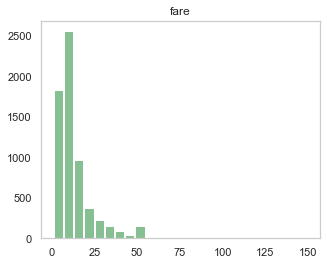

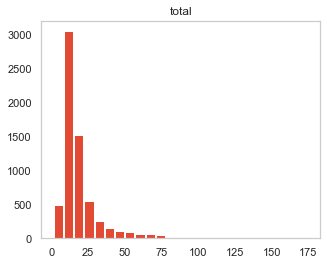

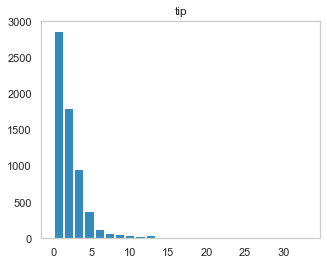

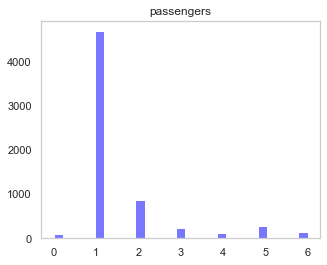

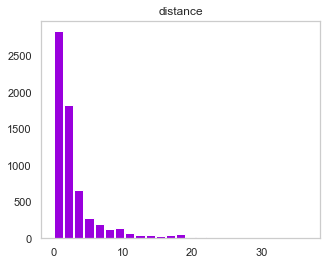

In [57]:
ax = df.hist(column='fare', bins=25, grid=False, figsize=(5,4), color='#86bf91', zorder=2, rwidth=0.9)
bx = df.hist(column='total', bins=25, grid=False, figsize=(5,4), color="#e24a33", zorder=2, rwidth=0.9)
cx = df.hist(column='tip', bins=25, grid=False, figsize=(5,4), color="#348abd", zorder=2, rwidth=0.9)
dx = df.hist(column='passengers', bins=25, grid=False, figsize=(5,4), color="#77f", zorder=2, rwidth=0.9)
ex = df.hist(column='distance', bins=25, grid=False, figsize=(5,4), color="#90d", zorder=2, rwidth=0.9)

In [20]:
# Investigate fare
df['fare'].value_counts()

7.50     350
6.00     345
6.50     323
5.00     313
5.50     312
        ... 
96.50      1
75.50      1
31.67      1
45.71      1
26.32      1
Name: fare, Length: 220, dtype: int64

In [21]:
# Investigate tip
df['tip'].value_counts()

0.00    2311
1.00     312
2.00     211
2.16      89
1.86      79
        ... 
7.94       1
7.95       1
0.89       1
9.36       1
7.70       1
Name: tip, Length: 489, dtype: int64

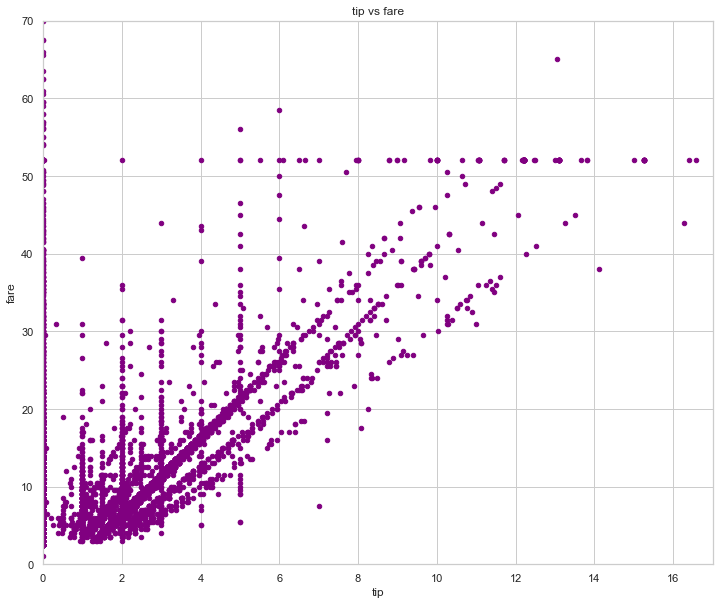

In [78]:
df.plot(kind='scatter',x= 'tip',y='fare',color='purple',figsize = (12,10), grid = True)
plt.gca().set(xlim=(0, 17), ylim=(0, 70) )
plt.xlabel('tip')
plt.ylabel('fare')
plt.title('tip vs fare')
plt.show()

## Build the model

In [22]:
#To find slope of the regression line
def Slope(a,b):
    n = len(a)
    dot_sum = np.sum(a*b)
    sumX = np.sum(a)
    sumY = np.sum(b)
    sumX2 = np.sum(a**2)
    slope = (n * dot_sum - sumX * sumY)/(n * sumX2 - sumX**2)
    return slope

In [23]:
#to find intercept of the linear regression line
def Intercept(a,b):
    intercept = np.mean(b) - Slope(a,b) * np.mean(a)
    return intercept

In [24]:
#to make predictions using the linear regression algorithm
def Prediction(slope, x_input, intercept):
    predict = slope * x_input + intercept
    return predict

In [25]:
#to find R-squared, which is the regression metric
def R_squared(predicted_values, test_values):
    f = predicted_values
    y = test_values
    sum_sq = np.sum((y - np.mean(y))**2) #equation for sum of squares
    sum_reg = np.sum((f - np.mean(y))**2) #equation for regression sum
    sum_res = np.sum((y - f)**2) #equation for residuals sum of squares
    R_2 = 1 - (sum_res/sum_sq) #equation for R-squared
    return R_2    

In [26]:
#to find the correlation coefficient for given x and y values
def Correlation_coeff(predicted_values, test_values):
    a = predicted_values
    b = test_values
    n = len(a)
    dot_sum = np.sum(a*b)
    sumX = np.sum(a)
    sumY = np.sum(b)
    sumX2 = np.sum(a**2)
    sumY2 = np.sum(b**2)
    score = (n *dot_sum - sumX * sumY) / np.sqrt((n * sumX2 - (sumX)**2)*(n * sumY2 - (sumY)**2))
    return score

In [27]:
#to find the covariance for given x and y values
def Covariance(X,Y):
    a = X
    b = Y
    n = len(a)
    dot_sum = np.sum(a*b)
    cov = dot_sum / n - np.mean(a) * np.mean(b)
    return cov

## Pre-Processing
Before we can run linear regression, we need to pre-process the data and encode labels. We will do this using sklearn's preprocessing package.

In [28]:
# function which takes the dataset as input and ouputs the processed dataset
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['pickup'] = le.fit_transform(res_df['pickup'])
    res_df['dropoff'] = le.fit_transform(res_df['dropoff'])
    res_df['passengers'] = le.fit_transform(res_df['passengers'])
    res_df['distance'] = le.fit_transform(res_df['distance'])
    res_df['fare'] = le.fit_transform(res_df['fare'])
    res_df['tip'] = le.fit_transform(res_df['tip'])
    res_df['color'] = le.fit_transform(res_df['color'])
    res_df['tolls'] = le.fit_transform(res_df['tolls'])
    res_df['total'] = le.fit_transform(res_df['total'])
    return res_df

# Run the function
encoded_df = preprocessor(df)

In [29]:
# Variable to be compared in the regression
X = encoded_df.fare
y = encoded_df.tip

# Implementation


In [30]:
# To train sets data must be divided into test
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [31]:
# To find the intercept of the training regression line using the functions created previously
intercept = Intercept(X_train,y_train)
slope = Slope(X_train,y_train)

predictions = Prediction(slope = slope,x_input = X_test, intercept = intercept)

print("R-squared:", R_squared(predicted_values = predictions, test_values = y_test))
print("Correlation Coefficient:", Correlation_coeff(test_values = y_test, predicted_values = predictions))

R-squared: 0.20595040442154278
Correlation Coefficient: 0.45671481531190816


In [32]:
#regression line equation
y_est = slope * X + intercept

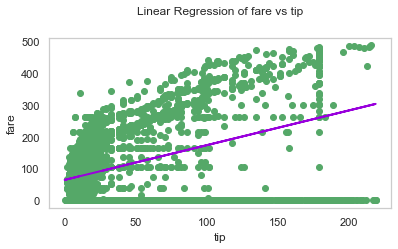

In [61]:
#Plotting of linear regression function
plt.scatter(X,y, c='g')
plt.plot(X,y_est, color = '#90d',linewidth=2)
plt.title('Linear Regression of fare vs tip', y=1.1)
plt.ylabel('fare')
plt.xlabel('tip')
plt.tight_layout(pad=2)
plt.grid(False)
plt.show()

**The line is a regression line**

C:\Users\durga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


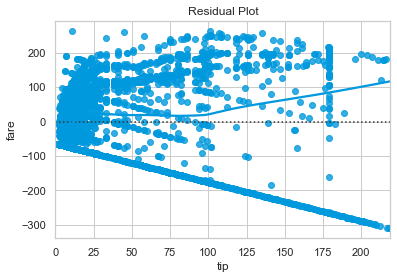

In [66]:
sns.set(style="whitegrid")
sns.residplot(X, y, lowess=True, color="#09d")
plt.title('Residual Plot')
plt.ylabel('fare')
plt.xlabel('tip')
plt.show()

R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. 


The R^2 value for this plot (0.2) is closer to 0 than 1.  In the output of the regression results, you see that R2  = 0.2. This indicates that 20% of the variance in thefare  tips can be explained by the fare